In [48]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("white")

# Data preparation

#### Load the data

In [49]:
df_episodes = pd.read_csv("../results/vanilla-full-run/logs/timing/20240329-11.46.27_episodes.csv", header=None)
# add column names
df_episodes.columns =['timestamp', 'name', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon']
df_episodes.head(5)

,timestamp,name,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon
0,2024-03-29 11:46:35.060,episodes,755,1,755,1225.0,1433,9.553333,250,400,False,2.275711,0.999819
1,2024-03-29 11:46:35.920,episodes,850,2,95,588.0,664,34.947368,381,100,False,1.733317,0.999795
2,2024-03-29 11:46:36.286,episodes,886,3,36,244.0,308,44.000000,393,0,False,2.064527,0.999786
3,2024-03-29 11:46:53.068,episodes,2725,4,1839,706.0,1129,3.076294,33,400,False,0.355269,0.999327
4,2024-03-29 11:46:53.370,episodes,2758,5,33,247.0,311,51.833333,394,0,False,6.327918,0.999318


- total_steps: the total of steps executed during the run
- episode: the episode over which the data is aggregated
- episode_steps: the number of steps in the episode
- reward: the total reward accumulated during the episode
- distance: the distance to the right achieved during the episode
- velocity: distance / (400 - game_time). This is an indication of how long it took to reach the distance
- game_time: the number of ticks on the game clock (countdown from 400)
- game_score: the score achieved in the game
- flag: indication whether Mario reached the flag during the episode
- loss: the loss 
- epsilon: the epsilon applied to the episode


#### plot the reward, distance and velocity per episode

<Axes: xlabel='episode', ylabel='reward'>

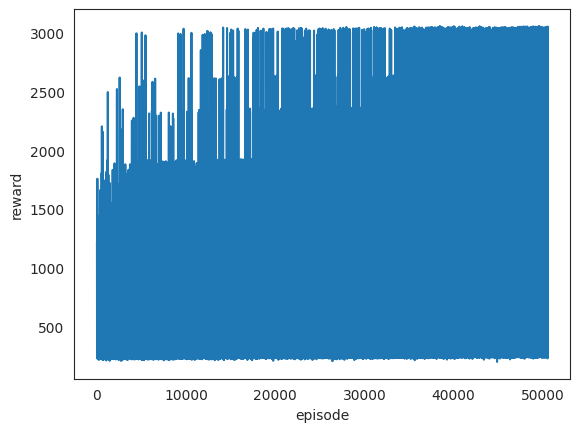

In [50]:
sns.lineplot(x='episode', y='reward', data=df_episodes)

Because of the epsilon during the reinforcement learning process, Mario can still die early late in the process, causing the rewards go all over the place.
Group the data in bins of 1000 and calculate the aggregates

In [71]:
bins_rewards = range(0, 51000, 1000)
df_agg_rewards = df_episodes.groupby(pd.cut(df_episodes['episode'], bins=bins_rewards), observed=True)['reward'].agg(['mean', 'std', 'size'])
bins_rewards = [*bins_rewards]
bins_rewards.pop(0)
df_agg_rewards["bin"] = bins_rewards
df_agg_rewards.head(5)


,mean,std,size,bin
episode,,,,
"(0, 1000]",614.109,326.917920,1000,1000
"(1000, 2000]",654.289,345.179188,1000,2000
"(2000, 3000]",672.351,369.767470,1000,3000
"(3000, 4000]",707.882,371.811530,1000,4000
"(4000, 5000]",687.626,386.560442,1000,5000


[Text(0.5, 1.0, 'Mean rewards per 1000 episodes'),
 Text(0.5, 0, 'episode'),
 Text(0, 0.5, 'mean rewards')]

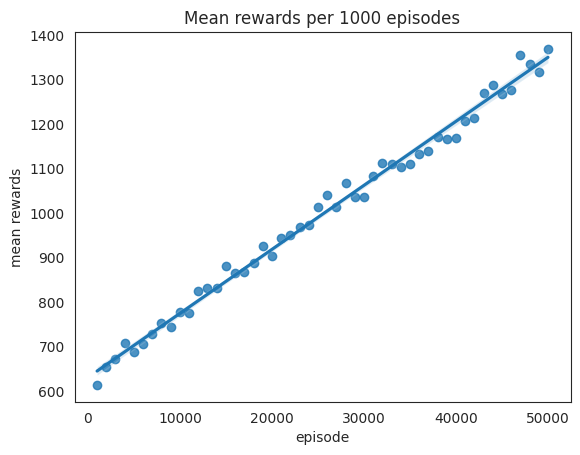

In [72]:
sns.regplot(x='bin', y='mean', data=df_agg_rewards).set(title='Mean rewards per 1000 episodes', xlabel="episode", ylabel="mean rewards")

Do the same for velocity


In [73]:
bins_velocity = range(0, 51000, 1000)
df_agg_velocity = df_episodes.groupby(pd.cut(df_episodes['episode'], bins=bins_velocity), observed=True)['velocity'].agg(['mean', 'std', 'size'])
bins_velocity = [*bins_velocity]
bins_velocity.pop(0)
df_agg_velocity["bin"] = bins_velocity
df_agg_velocity.head(5)

,mean,std,size,bin
episode,,,,
"(0, 1000]",29.853768,15.649569,1000,1000
"(1000, 2000]",29.650656,15.092697,1000,2000
"(2000, 3000]",30.782204,15.159675,1000,3000
"(3000, 4000]",31.312617,14.146827,1000,4000
"(4000, 5000]",32.824619,14.191733,1000,5000


[Text(0.5, 1.0, 'Mean velocity per 1000 episodes'),
 Text(0.5, 0, 'episode'),
 Text(0, 0.5, 'mean velocity')]

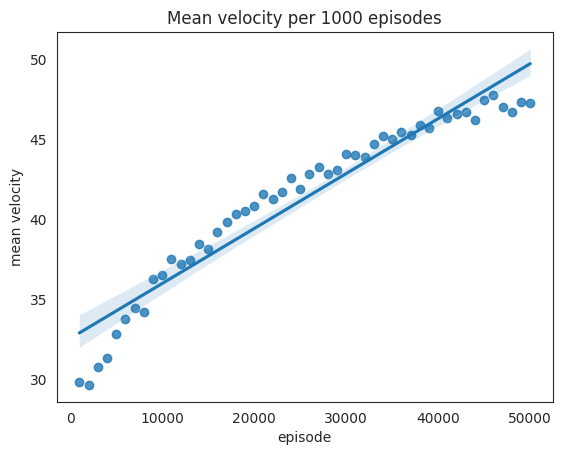

In [74]:
sns.regplot(x='bin', y='mean', data=df_agg_velocity).set(title='Mean velocity per 1000 episodes', xlabel="episode", ylabel="mean velocity")

And finally plot the average number of flags per 1000 episodes

In [75]:
bins_flags = range(0, 51000, 1000)
df_agg_flags = df_episodes.groupby(pd.cut(df_episodes['episode'], bins=bins_flags), observed=True)['flag'].agg(['mean', 'std', 'size'])
bins_flags = [*bins_flags]
bins_flags.pop(0)
df_agg_flags["bin"] = bins_flags
df_agg_flags.head(5)

,mean,std,size,bin
episode,,,,
"(0, 1000]",0.000,0.000000,1000,1000
"(1000, 2000]",0.000,0.000000,1000,2000
"(2000, 3000]",0.000,0.000000,1000,3000
"(3000, 4000]",0.000,0.000000,1000,4000
"(4000, 5000]",0.001,0.031623,1000,5000


[Text(0.5, 1.0, 'Mean number of wins per 1000 episodes'),
 Text(0.5, 0, 'episode'),
 Text(0, 0.5, 'mean number of wins')]

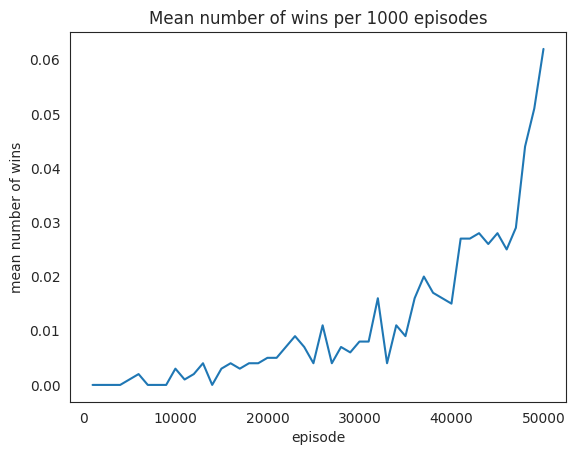

In [76]:
sns.lineplot(x='bin', y='mean', data=df_agg_flags).set(title='Mean number of wins per 1000 episodes', xlabel="episode", ylabel="mean number of wins")

The loss function seems to be super weird

<Axes: xlabel='episode', ylabel='loss'>

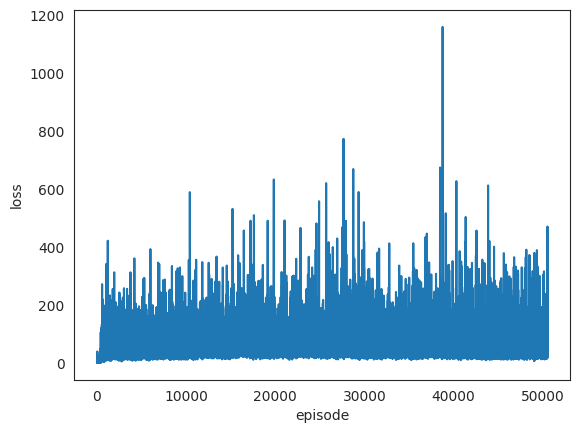

In [55]:
sns.lineplot(x='episode', y='loss', data=df_episodes)